# Credit Card Prediction Analysis

# Konteks

Kartu skor kredit adalah metode pengendalian risiko yang umum di industri keuangan. Ini menggunakan informasi pribadi dan data yang dikirimkan oleh pemohon kartu kredit untuk memprediksi kemungkinan gagal bayar di masa depan dan pinjaman kartu kredit. Bank dapat memutuskan apakah akan menerbitkan kartu kredit kepada pemohon. Nilai kredit dapat mengukur besarnya risiko secara objektif.

Secara umum, kartu skor kredit didasarkan pada data historis. Setelah menghadapi fluktuasi ekonomi yang besar. Model masa lalu mungkin kehilangan kekuatan prediksi aslinya. Model logistik adalah metode umum untuk penilaian kredit. Karena Logistic cocok untuk tugas klasifikasi biner dan dapat menghitung koefisien setiap fitur. Untuk memudahkan pemahaman dan pengoperasian, kartu skor akan mengalikan koefisien regresi logistik dengan nilai tertentu (misalnya 100) dan membulatkannya.

Saat ini, dengan berkembangnya algoritma pembelajaran mesin. Metode yang lebih prediktif seperti Boosting, Random Forest, dan Support Vector Machines telah diperkenalkan ke dalam penilaian kartu kredit. Namun, metode-metode tersebut sering kali tidak memiliki transparansi yang baik. Mungkin sulit untuk memberikan alasan penolakan atau penerimaan kepada pelanggan dan regulator.



# Tugas
Buat model pembelajaran mesin untuk memprediksi apakah pelamar adalah klien 'baik' atau 'buruk', berbeda dari tugas lainnya, definisi 'baik' atau 'buruk' tidak diberikan. Anda harus menggunakan beberapa teknik, seperti analisis vintage untuk membuat label Anda. Selain itu, masalah ketidakseimbangan data merupakan masalah besar dalam tugas ini.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting data using two data sources

### Membaca Dataset
Membaca data `application_record.csv` dan `credit_record.csv` untuk eksplorasi awal.

In [2]:
app = pd.read_csv("application_record.csv")
crecord = pd.read_csv("credit_record.csv")

* Using different methods to understand data
* data is complex and both dataset need some kind of transformation before analysis
* datasets are indivudally dealt with and then eventually compiled using joins

In [3]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
crecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [5]:
app['ID'].nunique() # the total rows are 438,557. This means it has duplicate

438510

In [6]:
crecord['ID'].nunique()


45985

In [7]:
len(set(crecord['ID']).intersection(set(app['ID']))) # checking to see how many records match in two datasets

36457

### Visualisasi Missing Value
Plot heatmap untuk melihat distribusi nilai kosong dalam dataset.

![missing-value-heatmap](missing_heatmap.png)

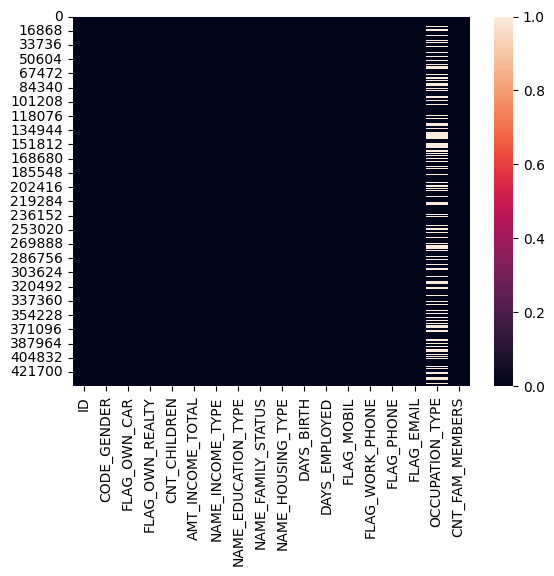

In [10]:
sns.heatmap(app.isnull()) # checking for null values. Seems like occupation_type has many
plt.savefig('missing_heatmap1.png')

### Visualisasi Missing Value
Plot heatmap untuk melihat distribusi nilai kosong dalam dataset.

![missing-value-heatmap](missing_heatmap.png)

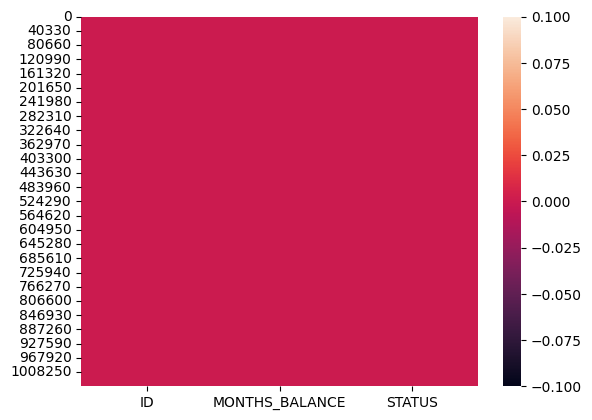

In [11]:
sns.heatmap(crecord.isnull()) # checking for null values. All good here!
plt.savefig('missing_heatmap2.png')

### Menghapus Duplikat
Menghapus data duplikat berdasarkan kolom `ID`.

In [12]:
app = app.drop_duplicates('ID', keep='last')
# we identified that there are some duplicates in this dataset
# we will be deleting those duplicates and will keep the last entry of the ID if its repeated.

In [13]:
app.drop('OCCUPATION_TYPE', axis=1, inplace=True)
#we identified earlier that occupation_type has many missing values
# we will drop this column

In [14]:
ot = pd.DataFrame(app.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type
#we are filtering the columns that have non numeric values to see if they are useful

,index
1,CODE_GENDER
2,FLAG_OWN_CAR
3,FLAG_OWN_REALTY
6,NAME_INCOME_TYPE
7,NAME_EDUCATION_TYPE
8,NAME_FAMILY_STATUS
9,NAME_HOUSING_TYPE


In [15]:
num_type = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']
#HAVE CREATED SEPARATE LIST FOR NUMERIC TYPE INCASE IT WILL BE NEEDED IN FURTHER ANALYSIS
# IT IS NEEDED IN FURTHER ANALYSIS

In [16]:
a = app[object_type]['CODE_GENDER'].value_counts()
b = app[object_type]['FLAG_OWN_CAR'].value_counts()
c = app[object_type]['FLAG_OWN_REALTY'].value_counts()
d = app[object_type]['NAME_INCOME_TYPE'].value_counts()
e = app[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = app[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = app[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e, '\n', f, '\n', g)

#this is just to see what each column is.
#It seems that all of them are important since there is very fine classifcation in each column.
# their effectiveness cannot be judged at this moment so we convert all of them to numeric values.

CODE_GENDER
F    294412
M    144098
Name: count, dtype: int64 
 FLAG_OWN_CAR
N    275428
Y    163082
Name: count, dtype: int64 
 FLAG_OWN_REALTY
Y    304043
N    134467
Name: count, dtype: int64 
 NAME_INCOME_TYPE
Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: count, dtype: int64 
 NAME_EDUCATION_TYPE
Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64 
 NAME_FAMILY_STATUS
Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: count, dtype: int64 
 NAME_HOUSING_TYPE
House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartmen

### Encoding Variabel Kategorikal
Variabel kategori diubah ke bentuk numerik menggunakan `LabelEncoder`.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])
# we have transformed all the non numeric data columns into data columns
# this method applies 0,1.. classification to different value types.

In [18]:
app.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0


In [19]:
app[num_type].head()
# We will look at numeric columns and see if there is anything that needs to be changed.

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0


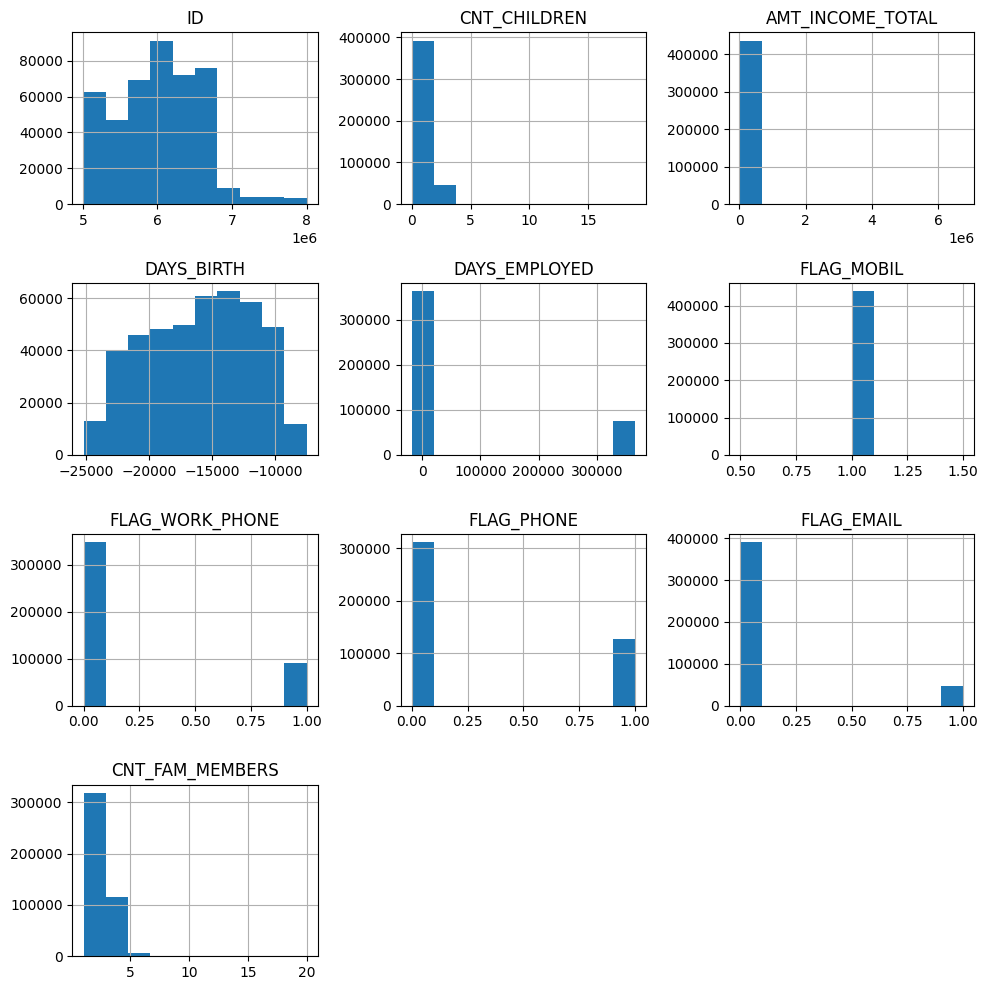

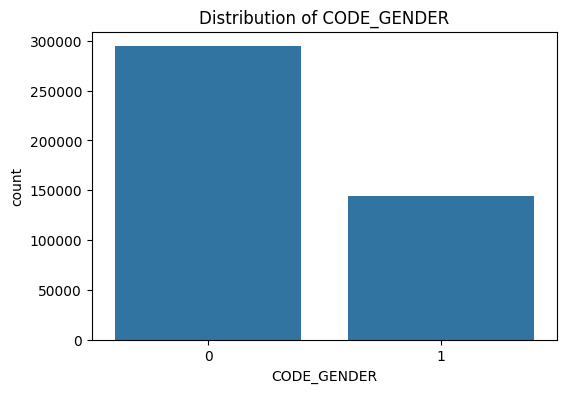

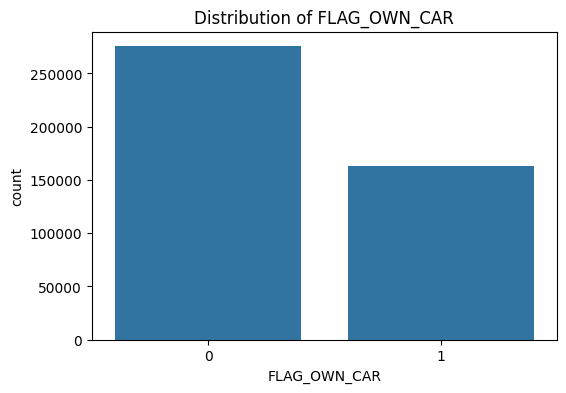

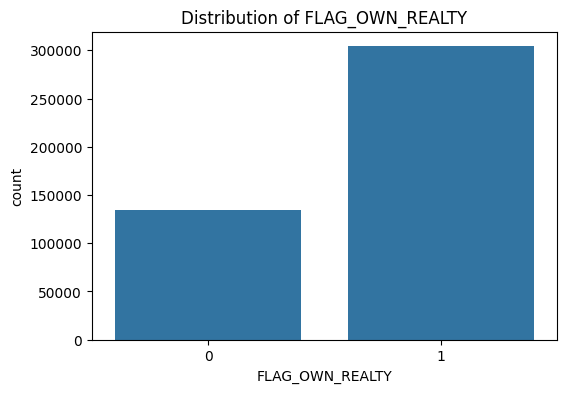

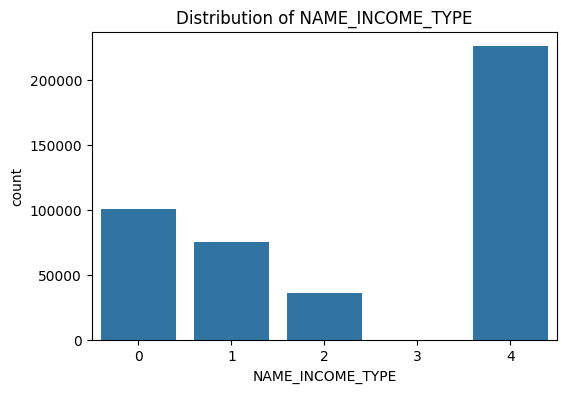

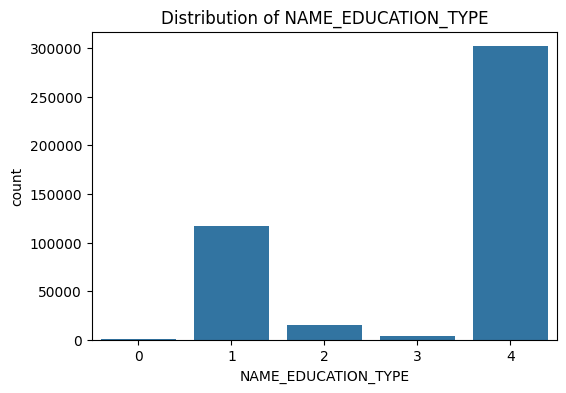

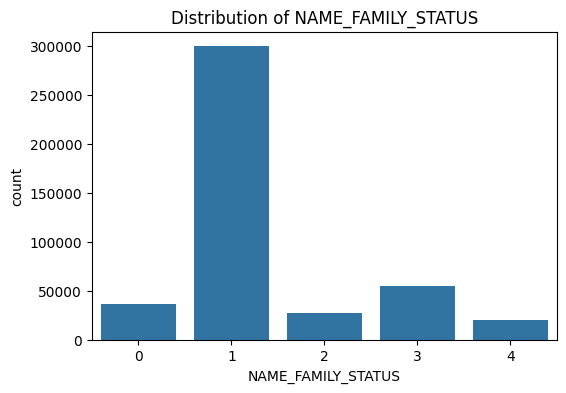

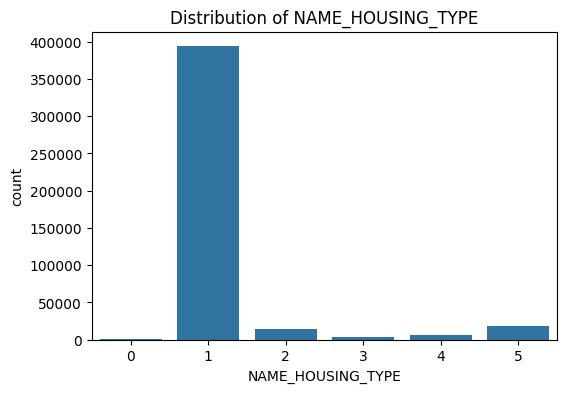

In [20]:
# prompt: coba buat codingan visualisasi dari data preparation nya

# Visualisasi Data
# Histogram untuk kolom numerik
app[num_type].hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Countplot untuk kolom kategorikal yang sudah di-encode
for col in object_type:
  plt.figure(figsize=(6, 4))
  sns.countplot(x=col, data=app)
  plt.title(f'Distribution of {col}')
  plt.show()



<Axes: xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

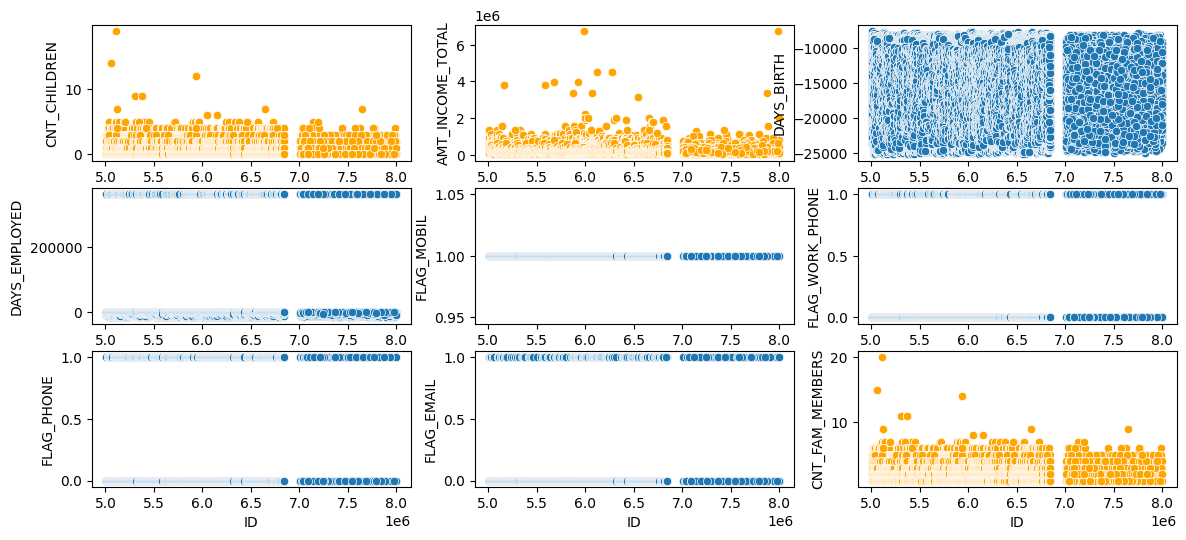

In [21]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

There are outliers in 3 columns.
1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. CNT_FAM_MEMBERS

* We need to remove these outliers to make sure they do not affect our model results.
* We will now remove these outliers.

### Menghapus Outlier
Outlier dihapus menggunakan metode IQR pada kolom `CNT_CHILDREN`, `AMT_INCOME_TOTAL`, dan `CNT_FAM_MEMBERS`.

In [22]:
# FOR CNT_CHILDREN COLUMN
q_hi = app['CNT_CHILDREN'].quantile(0.999)
q_low = app['CNT_CHILDREN'].quantile(0.001)
app = app[(app['CNT_CHILDREN']>q_low) & (app['CNT_CHILDREN']<q_hi)]

In [23]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = app['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app['AMT_INCOME_TOTAL'].quantile(0.001)
app= app[(app['AMT_INCOME_TOTAL']>q_low) & (app['AMT_INCOME_TOTAL']<q_hi)]

In [24]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = app['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app['CNT_FAM_MEMBERS'].quantile(0.001)
app= app[(app['CNT_FAM_MEMBERS']>q_low) & (app['CNT_FAM_MEMBERS']<q_hi)]

<Axes: xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

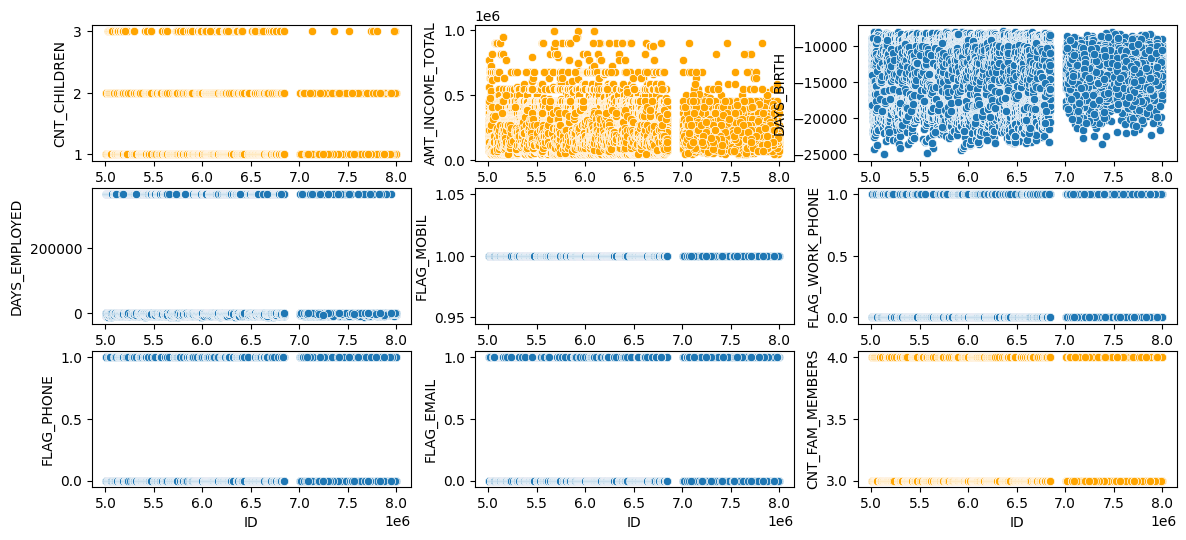

In [25]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

In [26]:
crecord['Months from today'] = crecord['MONTHS_BALANCE']*-1
crecord = crecord.sort_values(['ID','Months from today'], ascending=True)
crecord.head(10)
# we calculated months from today column to see how much old is the month
# we also sort the data according to ID and Months from today columns.

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


### Transformasi Nilai STATUS
Nilai `STATUS` diubah ke format biner agar sesuai dengan tugas klasifikasi.

In [27]:
crecord['STATUS'].value_counts()
# performed a value count on status to see how many values exist of each type

,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223


### Transformasi Nilai STATUS
Nilai `STATUS` diubah ke format biner agar sesuai dengan tugas klasifikasi.

In [28]:
crecord['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
# Fill any remaining NaN values with 0 before converting to integer
crecord['STATUS'].fillna(0, inplace=True)
crecord['STATUS'] = crecord['STATUS'].astype('int')
crecord['STATUS'] = crecord['STATUS'].apply(lambda x:1 if x >= 2 else 0)

<ipython-input-28-9081ef1b8c07>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crecord['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)


### Transformasi Nilai STATUS
Nilai `STATUS` diubah ke format biner agar sesuai dengan tugas klasifikasi.

In [30]:
crecord['STATUS'].value_counts(normalize=True)


,proportion
STATUS,
0,0.99704
1,0.00296


In [31]:
crecordgb = crecord.groupby('ID').agg(max).reset_index()
crecordgb.head()
#we are grouping the data in crecord by ID so that we can join it with app

<ipython-input-31-12354d2c3399>:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  crecordgb = crecord.groupby('ID').agg(max).reset_index()


,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [32]:
df = app.join(crecordgb.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()
# no that this is joined, we will solve over sampling issue

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0


df.info() # checking for number of rows.
# there are 9516 rows.

In [33]:
df.info() # checking for number of rows.
# there are 9516 rows.

<class 'pandas.core.frame.DataFrame'>
Index: 9516 entries, 29 to 434805
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   int64  
 2   FLAG_OWN_CAR         9516 non-null   int64  
 3   FLAG_OWN_REALTY      9516 non-null   int64  
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   int64  
 7   NAME_EDUCATION_TYPE  9516 non-null   int64  
 8   NAME_FAMILY_STATUS   9516 non-null   int64  
 9   NAME_HOUSING_TYPE    9516 non-null   int64  
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  FLAG_MOBIL           9516 non-null   int64  
 13  FLAG_WORK_PHONE      9516 non-null   int64  
 14  FLAG_PHONE           9516 non-null   int64  
 15  FLAG_EMAIL           9516 non-null   int

In [34]:
X = df.iloc[:,1:-1] # X value contains all the variables except labels
y = df.iloc[:,-1] # these are the labels

### Split Data
Membagi data ke dalam set latih dan uji dengan rasio 70:30.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
# we create the test train split first

### Scaling
Melakukan normalisasi fitur numerik menggunakan MinMaxScaler.

In [36]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)
# we have now fit and transform the data into a scaler for accurate reading and results.

### Menangani Ketidakseimbangan Kelas
Menggunakan SMOTE untuk oversampling data minoritas.

In [37]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
# we have addressed the issue of oversampling here

In [38]:
y_train.value_counts()

,count
STATUS,
0,6565
1,96


In [39]:
y_balanced.value_counts()

,count
STATUS,
0,6565
1,6565


In [40]:
y_test.value_counts()

,count
STATUS,
0,2800
1,55


In [41]:
y_test_balanced.value_counts()

,count
STATUS,
0,2800
1,2800


* We notice in the value counts above that label types are now balanced
* the problem of oversampling is solved now
* we will now implement different models to see which one performs the best

### Model Development
Melatih beberapa model klasifikasi termasuk Logistic Regression, SVM, Decision Tree, Random Forest, dan XGBoost.

Fungsi evaluate_model()

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## 🎯 Evaluasi Model: Logistic Regression



=== Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.62      0.56      2800
           1       0.52      0.42      0.46      2800

    accuracy                           0.52      5600
   macro avg       0.52      0.52      0.51      5600
weighted avg       0.52      0.52      0.51      5600



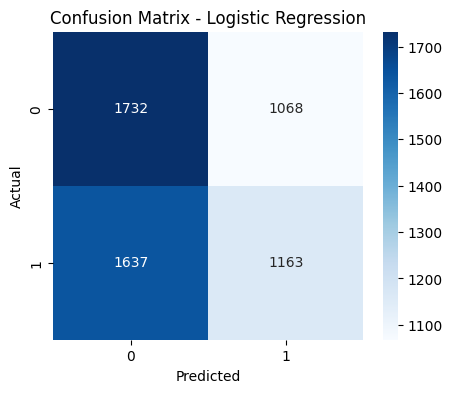

In [51]:
from sklearn.linear_model import LogisticRegression

evaluate_model("Logistic Regression", LogisticRegression(),
               X_balanced, X_test_balanced, y_balanced, y_test_balanced)


📌 KNN
## 🎯 Evaluasi Model: K-Nearest Neighbors (KNN)



=== K-Nearest Neighbors ===
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      2800
           1       0.93      0.45      0.61      2800

    accuracy                           0.71      5600
   macro avg       0.78      0.71      0.69      5600
weighted avg       0.78      0.71      0.69      5600



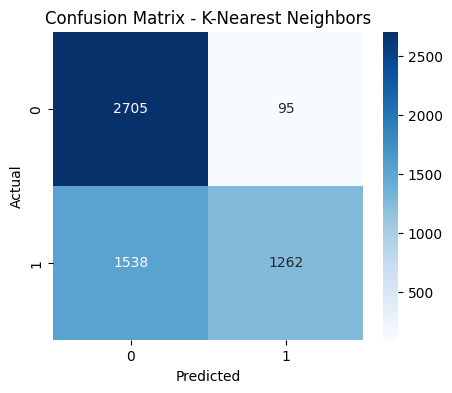

In [52]:
from sklearn.neighbors import KNeighborsClassifier

evaluate_model("K-Nearest Neighbors", KNeighborsClassifier(),
               X_balanced, X_test_balanced, y_balanced, y_test_balanced)


## 🎯 Evaluasi Model: Support Vector Machine (SVM)



=== SVM ===
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79      2800
           1       0.85      0.64      0.73      2800

    accuracy                           0.77      5600
   macro avg       0.78      0.77      0.76      5600
weighted avg       0.78      0.77      0.76      5600



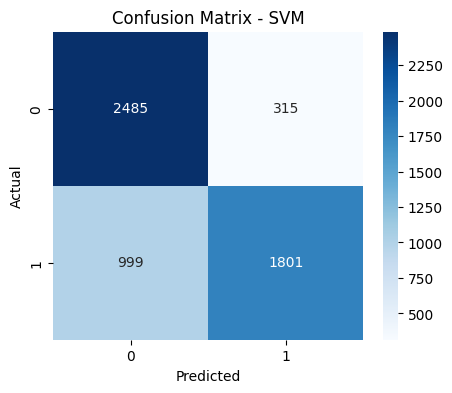

In [53]:
from sklearn.svm import SVC

evaluate_model("SVM", SVC(),
               X_balanced, X_test_balanced, y_balanced, y_test_balanced)


## 🎯 Evaluasi Model: Decision Tree



=== Decision Tree ===
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      2800
           1       0.98      0.60      0.74      2800

    accuracy                           0.79      5600
   macro avg       0.84      0.79      0.78      5600
weighted avg       0.84      0.79      0.78      5600



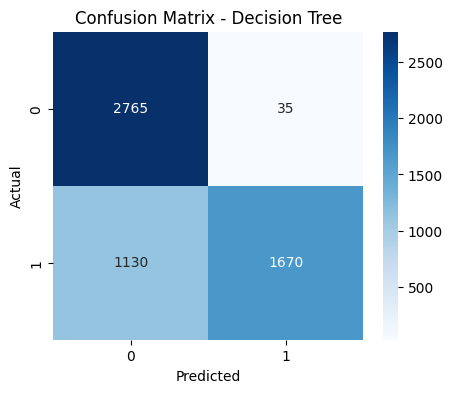

In [54]:
from sklearn.tree import DecisionTreeClassifier

evaluate_model("Decision Tree", DecisionTreeClassifier(),
               X_balanced, X_test_balanced, y_balanced, y_test_balanced)


## 🎯 Evaluasi Model: Random Forest



=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      2800
           1       0.98      0.60      0.75      2800

    accuracy                           0.80      5600
   macro avg       0.85      0.80      0.79      5600
weighted avg       0.85      0.80      0.79      5600



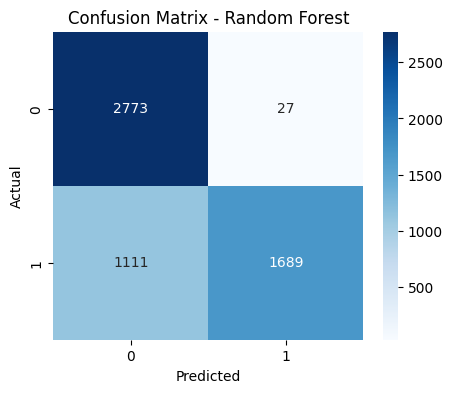

In [55]:
from sklearn.ensemble import RandomForestClassifier

evaluate_model("Random Forest", RandomForestClassifier(),
               X_balanced, X_test_balanced, y_balanced, y_test_balanced)


## 🎯 Evaluasi Model: XGBoost



=== XGBoost ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:57:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2800
           1       0.99      0.80      0.88      2800

    accuracy                           0.90      5600
   macro avg       0.91      0.90      0.89      5600
weighted avg       0.91      0.90      0.89      5600



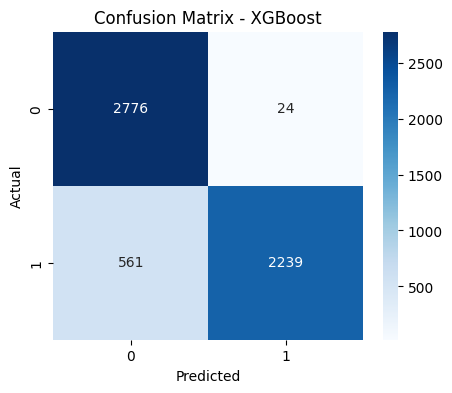

In [56]:
from xgboost import XGBClassifier

evaluate_model("XGBoost",
               XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
               X_balanced, X_test_balanced, y_balanced, y_test_balanced)


In [ ]:

from graphviz import Digraph

dot = Digraph(comment='Model Workflow')

# Nodes
dot.node('A', 'Load Data\n(application_record, credit_record)')
dot.node('B', 'Data Cleaning & Preprocessing\n(Handle Duplicates, Missing Values)')
dot.node('C', 'Feature Engineering\n(Months from today)')
dot.node('D', 'Data Transformation\n(Label Encoding, Outlier Removal)')
dot.node('E', 'Merge Data')
dot.node('F', 'Target Variable Creation\n(STATUS Transformation)')
dot.node('G', 'Split Data\n(Train/Test)')
dot.node('H', 'Feature Scaling\n(MinMaxScaler)')
dot.node('I', 'Handle Class Imbalance\n(SMOTE)')
dot.node('J', 'Model Training\n(Logistic Regression, SVM, etc.)')
dot.node('K', 'Model Evaluation\n(Accuracy)')
dot.node('L', 'Best Model Selection\n(XGBoost)')
dot.node('M', 'Prediction')

# Edges
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI', 'IJ', 'JK', 'KL', 'LM'])

# Render the graph
dot.render('model_workflow', view=True, cleanup=True)


'model_workflow.pdf'

### Evaluasi Model Terbaik
Menggunakan classification report untuk menilai performa model terbaik (XGBoost).

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2800
           1       0.99      0.80      0.88      2800

    accuracy                           0.90      5600
   macro avg       0.91      0.90      0.89      5600
weighted avg       0.91      0.90      0.89      5600



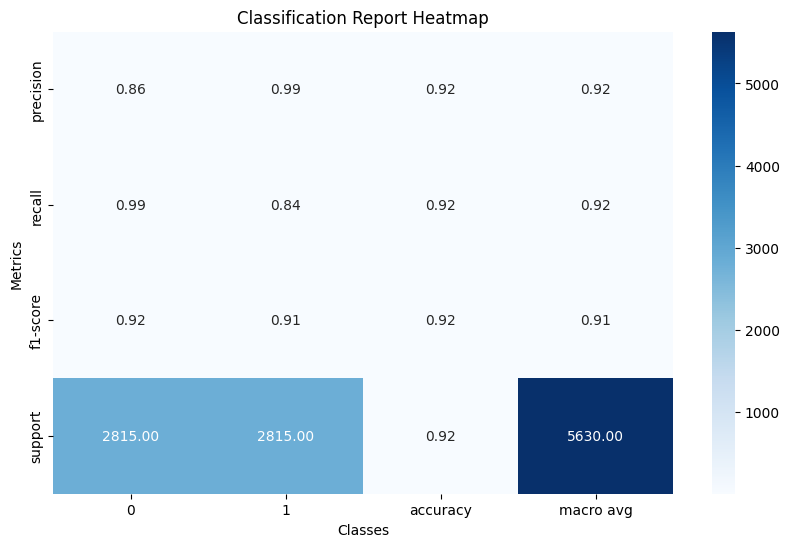

<ipython-input-47-a0bdbf331d83>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ax=axes[i], palette='viridis')
<ipython-input-47-a0bdbf331d83>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ax=axes[i], palette='viridis')
<ipython-input-47-a0bdbf331d83>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=data, ax=axes[i], palette='viridis')


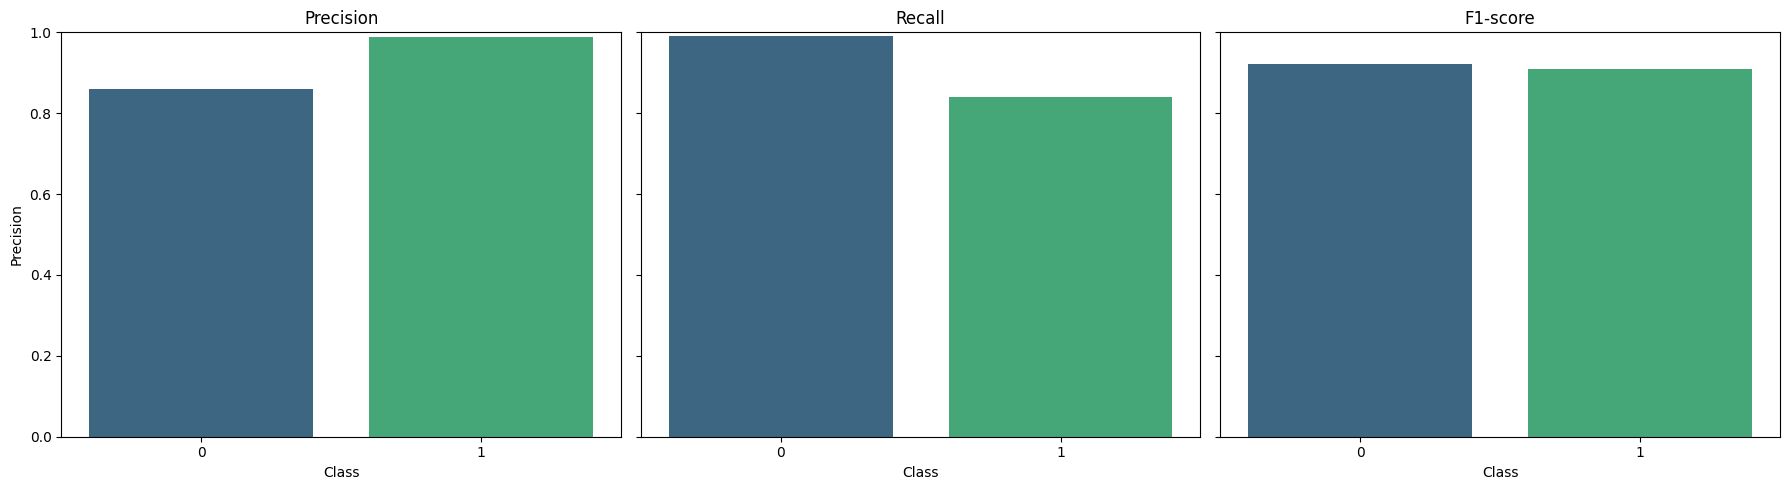

In [ ]:
# prompt: buatkan codingan visualisasi evaluation metrics

# Visualisasi Classification Report
report = classification_report(y_test_balanced, prediction, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f")
plt.title('Classification Report Heatmap')
plt.ylabel('Metrics')
plt.xlabel('Classes')
plt.show()

# Optional: Bar plot for precision, recall, f1-score
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, metric in enumerate(metrics):
    data = [df_report.loc[classes[0], metric], df_report.loc[classes[1], metric]]
    sns.barplot(x=classes, y=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric.capitalize()}')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(metric.capitalize() if i == 0 else "")
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()


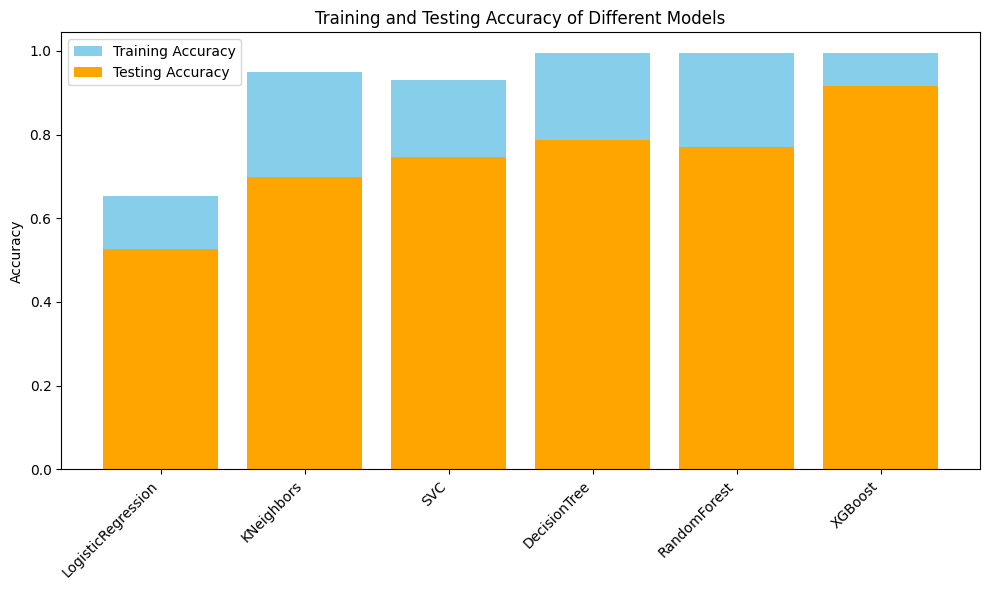

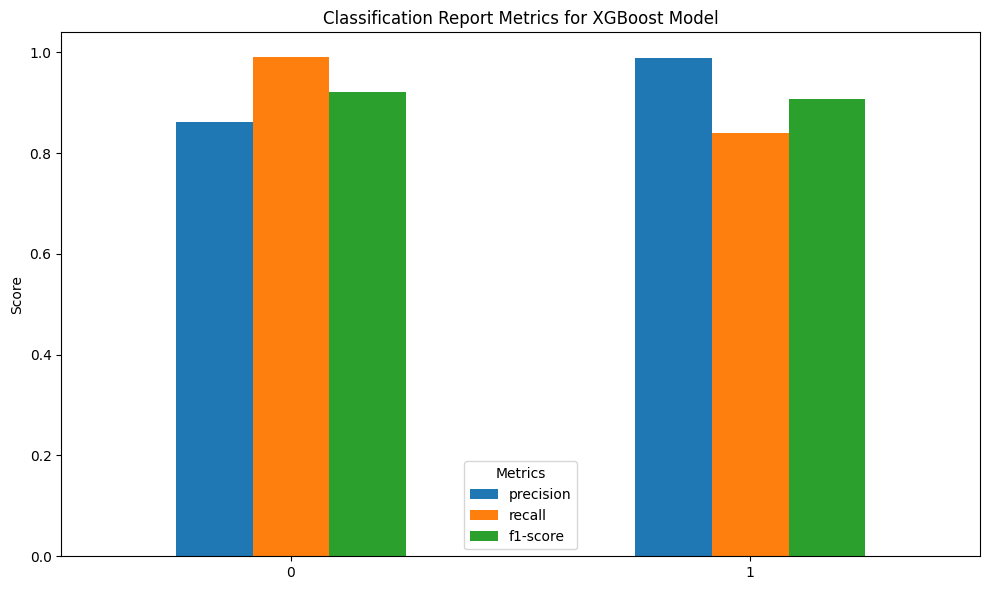

In [ ]:
# prompt: buatkan kodingan hasil evaluasi model tadi dengan bentuk visualisasi

model_names = list(classifiers.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, train_scores, label='Training Accuracy', color='skyblue')
plt.bar(model_names, test_scores, label='Testing Accuracy', color='orange')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# For the best model (XGBoost), visualize the classification report
# Extract precision, recall, f1-score for class 0 and 1
report_dict = classification_report(y_test_balanced, prediction, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

# Keep only the rows for class 0, class 1, and 'macro avg' or 'weighted avg' if needed
metrics_to_plot = ['0', '1'] # Adjust if you want to include averages

df_plot = df_report.loc[metrics_to_plot, ['precision', 'recall', 'f1-score']]

df_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics for XGBoost Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()
